In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

Processing random frame: 318


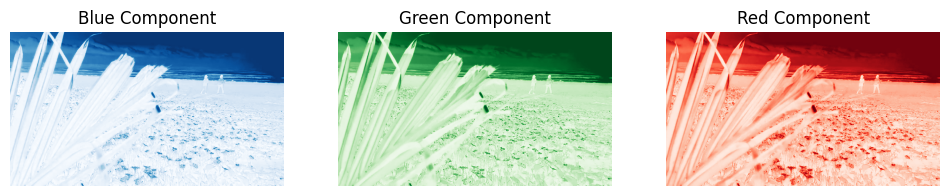

Processing random frame: 150


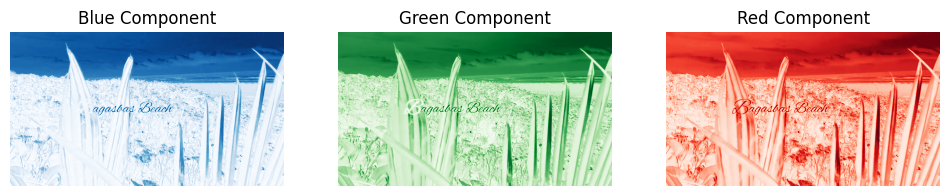

Processing random frame: 158


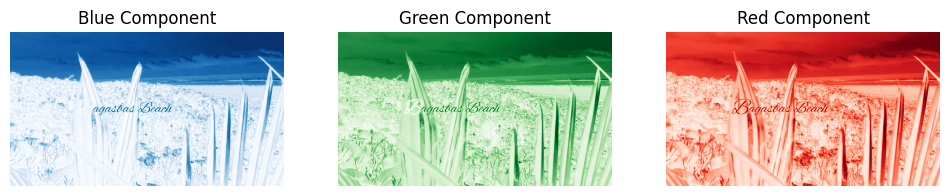

Processing random frame: 181


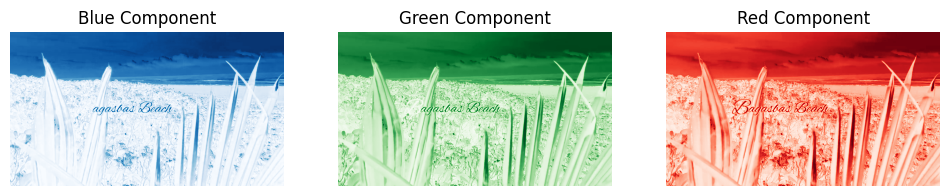

Processing random frame: 125


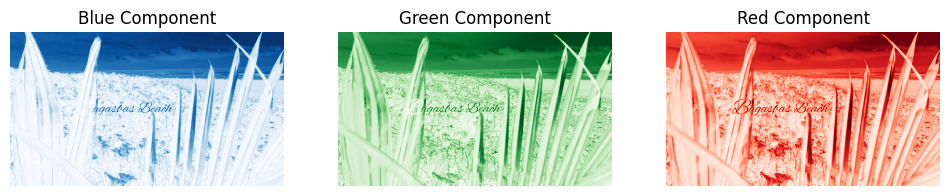

In [ ]:
def extract_random_frames(video_path, output_folder, num_frames):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Extract random frame indices
    random_frame_indices = random.sample(range(total_frames), num_frames)

    # Initialize frame count
    frame_count = 0

    # Read until all random frames are extracted
    for frame_index in random_frame_indices:
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        # Read the frame
        ret, frame = cap.read()

        # If the frame is not read successfully, continue to the next frame
        if not ret:
            continue

        # Display the frame number
        print("Processing random frame:", frame_index)

        # Split the frame into its color components (BGR)
        blue, green, red = cv2.split(frame)

        # Save the color component images to the output folder
        cv2.imwrite(os.path.join(output_folder, f"frame_{frame_index:04d}_blue.jpg"), blue)
        cv2.imwrite(os.path.join(output_folder, f"frame_{frame_index:04d}_green.jpg"), green)
        cv2.imwrite(os.path.join(output_folder, f"frame_{frame_index:04d}_red.jpg"), red)

        # Plot the color component images
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(blue, cmap='Blues')
        plt.title('Blue Component')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(green, cmap='Greens')
        plt.title('Green Component')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(red, cmap='Reds')
        plt.title('Red Component')
        plt.axis('off')

        plt.show()

    # Release the video capture object
    cap.release()

# Path to the input video file
video_path = 'cv_vid.mp4'

# Output folder to save frames
output_folder = 'cv_output_random_frames'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Number of random frames to extract
num_frames = 5

# Extract random frames from the video
extract_random_frames(video_path, output_folder, num_frames)
